# CLASSIFICATION MODELS

1. LOGISTIC REGRESSION
2. DECISION TREE
3. RANDOM FOREST
4. K-NEAREST NEIGHBOURS
5. NAIV BIAS

In [1]:
# Import libraraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
data = pd.read_csv(r"C:\SUHAIL\Reshma miss\weatherAUS.csv")

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
data.shape

(145460, 23)

In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
# Checking missing values
missing_number = data.isna().sum()
missing_percentage = (data.isna().sum()/data.shape[0])
missing_values = pd.concat([missing_number,missing_percentage], axis = 1, keys=["missing_number", "missing_percentage"])
missing_values = missing_values[missing_number > 0]
missing_values

,missing_number,missing_percentage
MinTemp,1485,0.010209
MaxTemp,1261,0.008669
Rainfall,3261,0.022419
Evaporation,62790,0.431665
Sunshine,69835,0.480098
WindGustDir,10326,0.070989
WindGustSpeed,10263,0.070555
WindDir9am,10566,0.072639
WindDir3pm,4228,0.029066
WindSpeed9am,1767,0.012148


<Figure size 500x500 with 0 Axes>

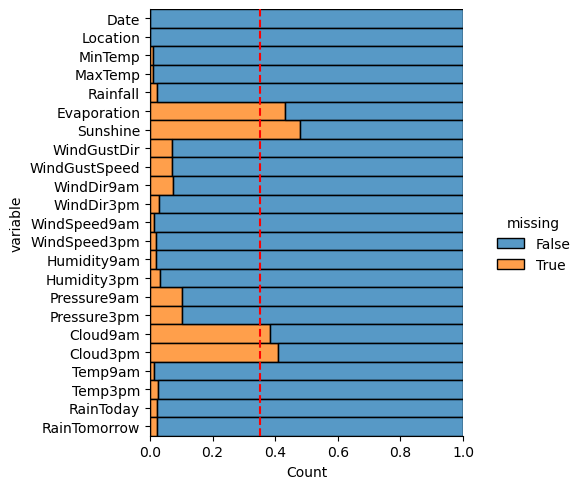

In [10]:
plt.figure(figsize = (5, 5))

sns.displot(
    data = data.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 5)
threshold=0.35
plt.axvline(threshold, color = "r", linestyle='--');

In [11]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
data['Cloud3pm'].value_counts()

Cloud3pm
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: count, dtype: int64

In [13]:
data['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [14]:
data['Date'].value_counts()

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64

In [15]:
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date','Location'], axis=1, inplace=True)

In [16]:
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [17]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
data['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustDir    135134 non-null  object 
 4   WindGustSpeed  135197 non-null  float64
 5   WindDir9am     134894 non-null  object 
 6   WindDir3pm     141232 non-null  object 
 7   WindSpeed9am   143693 non-null  float64
 8   WindSpeed3pm   142398 non-null  float64
 9   Humidity9am    142806 non-null  float64
 10  Humidity3pm    140953 non-null  float64
 11  Pressure9am    130395 non-null  float64
 12  Pressure3pm    130432 non-null  float64
 13  Temp9am        143693 non-null  float64
 14  Temp3pm        141851 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(5)
mem

In [20]:
data['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [21]:
data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [23]:
# impute missing values into using mode
most_fre_columns = ['WindDir9am','WindDir3pm','WindGustDir','RainToday', 'RainTomorrow']

In [24]:
for column in most_fre_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [25]:
data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

In [26]:
numerical_columns = data.select_dtypes(exclude=['O']).columns

In [27]:
#from sklearn.impute import KNNImputer

# Initialize the KNNImputer
#imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit and transform the imputer on your training data
#data[mean_impute_columns] = imputer.fit_transform(data[mean_impute_columns])

In [28]:
# impute missing values into using mean

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
data[numerical_columns] = mean_imputer.fit_transform(data[numerical_columns])

In [29]:
data.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustDir    145460 non-null  object 
 4   WindGustSpeed  145460 non-null  float64
 5   WindDir9am     145460 non-null  object 
 6   WindDir3pm     145460 non-null  object 
 7   WindSpeed9am   145460 non-null  float64
 8   WindSpeed3pm   145460 non-null  float64
 9   Humidity9am    145460 non-null  float64
 10  Humidity3pm    145460 non-null  float64
 11  Pressure9am    145460 non-null  float64
 12  Pressure3pm    145460 non-null  float64
 13  Temp9am        145460 non-null  float64
 14  Temp3pm        145460 non-null  float64
 15  RainToday      145460 non-null  object 
 16  RainTomorrow   145460 non-null  object 
dtypes: float64(12), object(5)
mem

In [31]:
# Applty labelEncoding
label_columns = ["WindGustDir","WindDir9am","WindDir3pm"]
ohe_columns = ["RainToday","RainTomorrow"]

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [33]:
# Apply label encoding to each column in label_column
for col in label_columns:
    data[col] = labelencoder.fit_transform(data[col])

In [34]:
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [35]:
# Apply to OneHot encoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded = onehot_encoder.fit_transform(data[ohe_columns])

In [36]:
ohe_feature_names = onehot_encoder.get_feature_names_out(input_features=ohe_columns)
ohe_feature_names

array(['RainToday_Yes', 'RainTomorrow_Yes'], dtype=object)

In [37]:
data_ohe_columns = pd.DataFrame(encoded,columns=ohe_feature_names)

In [38]:
data_ohe_columns

,RainToday_Yes,RainTomorrow_Yes
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0
145458,0.0,0.0


In [39]:
data[ohe_feature_names] = data_ohe_columns

In [40]:
data.drop(columns=ohe_columns, inplace=True)

In [41]:
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
145456,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
145457,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
145458,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [42]:
data.describe(include='all')

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,8.09360,40.035230,6.999526,7.798852,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,16.990631,21.683390,0.219167,0.219146
std,6.365750,7.088124,8.382488,4.69411,13.118253,4.515839,4.538135,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,6.449221,6.850057,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.00000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,0.000000,0.000000
50%,12.100000,22.700000,0.000000,9.00000,39.000000,7.000000,8.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,16.800000,21.400000,0.000000,0.000000
75%,16.800000,28.200000,1.000000,13.00000,46.000000,11.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,0.000000,0.000000
max,33.900000,48.100000,371.000000,15.00000,135.000000,15.000000,15.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,1.000000,1.000000


In [43]:
data.rename(columns={'RainTomorrow_Yes': 'Rain tomorrow'}, inplace=True)

In [44]:
# split the data x and y

x = data.iloc[:,:16]
y = data["Rain tomorrow"]

In [45]:
x

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes
0,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0
1,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0
2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0
3,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0
4,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0
145456,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0
145457,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0
145458,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0


In [46]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rain tomorrow, Length: 145460, dtype: float64

In [47]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustDir    145460 non-null  int32  
 4   WindGustSpeed  145460 non-null  float64
 5   WindDir9am     145460 non-null  int32  
 6   WindDir3pm     145460 non-null  int32  
 7   WindSpeed9am   145460 non-null  float64
 8   WindSpeed3pm   145460 non-null  float64
 9   Humidity9am    145460 non-null  float64
 10  Humidity3pm    145460 non-null  float64
 11  Pressure9am    145460 non-null  float64
 12  Pressure3pm    145460 non-null  float64
 13  Temp9am        145460 non-null  float64
 14  Temp3pm        145460 non-null  float64
 15  RainToday_Yes  145460 non-null  float64
dtypes: float64(13), int32(3)
memory usage: 16.1 MB


In [48]:
numerical_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [49]:
# Apply StandardScaler to the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [50]:
x

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_Yes
0,0.189447,-4.533631e-02,-0.210072,13,0.302234,13,14,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,-0.014053,0.017023,0.0
1,-0.753101,2.650431e-01,-0.281650,14,0.302234,6,15,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.032464,0.381985,0.0
2,0.110901,3.496920e-01,-0.281650,15,0.454694,13,15,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,0.621685,0.221402,0.0
3,-0.470337,6.741796e-01,-0.281650,4,-1.222364,9,0,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,0.172017,0.703151,0.0
4,0.833521,1.280830e+00,-0.162353,13,0.073544,1,7,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.125499,1.170302,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.475720,2.520446e-02,-0.281650,0,-0.688755,9,1,-0.117754,-0.879093,-0.948349,-1.345267,1.032937,0.756925,-1.068448,0.104614,0.0
145456,-1.350047,2.932594e-01,-0.281650,6,-1.374824,9,3,-0.117754,-1.108541,-0.683163,-1.491815,0.869452,0.576852,-0.944401,0.411182,0.0
145457,-1.067283,5.189899e-01,-0.281650,3,-0.231375,9,14,-0.569169,-1.108541,-0.842274,-1.345267,0.497895,0.231711,-0.696308,0.644757,0.0
145458,-0.690264,5.330980e-01,-0.281650,9,-0.917445,10,3,-0.117754,-1.337990,-0.948349,-1.345267,0.260099,0.186693,-0.293158,0.630159,0.0


In [51]:
# split the data train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116368, 16), (29092, 16), (116368,), (29092,))

# Model Building

1. LOGISTIC REGRESSION

In [52]:
# Import libraries
from sklearn.linear_model import LogisticRegression

In [53]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [54]:
# Predictions
y_pred_train_l = model_logistic.predict(x_train)
y_pred_test_l = model_logistic.predict(x_test)

In [55]:
y_pred_train_l

array([0., 0., 0., ..., 0., 1., 0.])

In [56]:
y_pred_test_l

array([1., 0., 0., ..., 0., 0., 0.])

In [57]:
probability_score_train = model_logistic.predict_proba(x_train)

In [58]:
probability_score_train

array([[0.76879241, 0.23120759],
       [0.96665155, 0.03334845],
       [0.86491373, 0.13508627],
       ...,
       [0.94645254, 0.05354746],
       [0.18728588, 0.81271412],
       [0.96734368, 0.03265632]])

In [59]:
probability_score_test = model_logistic.predict_proba(x_test)

In [60]:
probability_score_test

array([[0.362122  , 0.637878  ],
       [0.95865365, 0.04134635],
       [0.78231318, 0.21768682],
       ...,
       [0.88183329, 0.11816671],
       [0.65834607, 0.34165393],
       [0.94029175, 0.05970825]])

In [61]:
model_logistic.score(x_train, y_train)

0.8406434758696549

In [62]:
model_logistic.score(x_test, y_test)

0.8384779320775471

Model evaluation

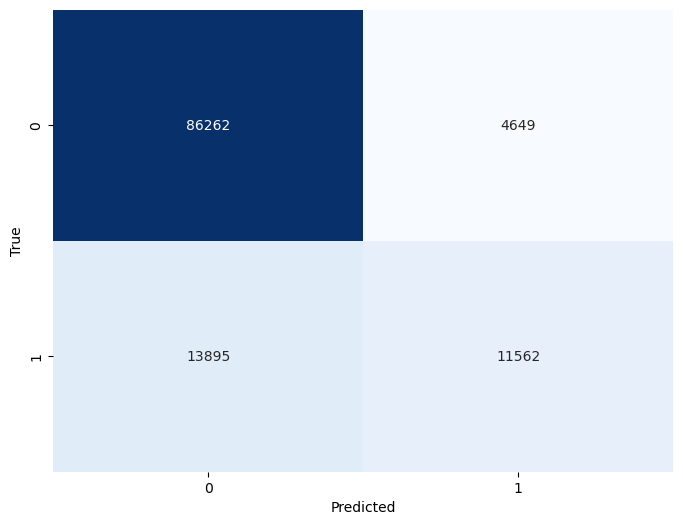

In [63]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train_l)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

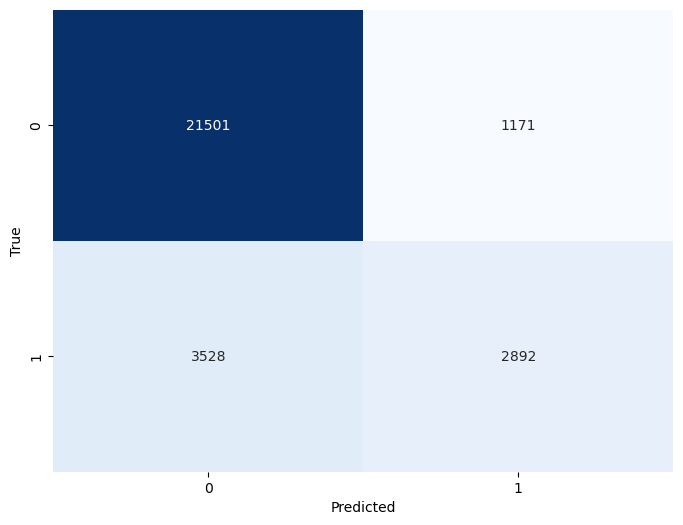

In [64]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_l)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train_l)
train_precision = precision_score(y_train, y_pred_train_l)
train_recall = recall_score(y_train, y_pred_train_l)
train_f1_score = f1_score(y_train, y_pred_train_l)
train_roc_auc = roc_auc_score(y_train, y_pred_train_l)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test_l)
test_precision = precision_score(y_test, y_pred_test_l)
test_recall = recall_score(y_test, y_pred_test_l)
test_f1_score = f1_score(y_test, y_pred_test_l)
test_roc_auc = roc_auc_score(y_test, y_pred_test_l)

In [66]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [67]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.840643
1,Precision score,0.713219
2,Recall score,0.454178
3,F1 score,0.554958
4,Roc Auc score,0.701520


In [68]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.838478
1,Precision score,0.711789
2,Recall score,0.450467
3,F1 score,0.551750
4,Roc Auc score,0.699409


2. DECISION TREE

In [69]:
# import decision tree classifier
from sklearn import tree
from IPython.display import Image, display

In [70]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, max_features="sqrt")

In [71]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt')

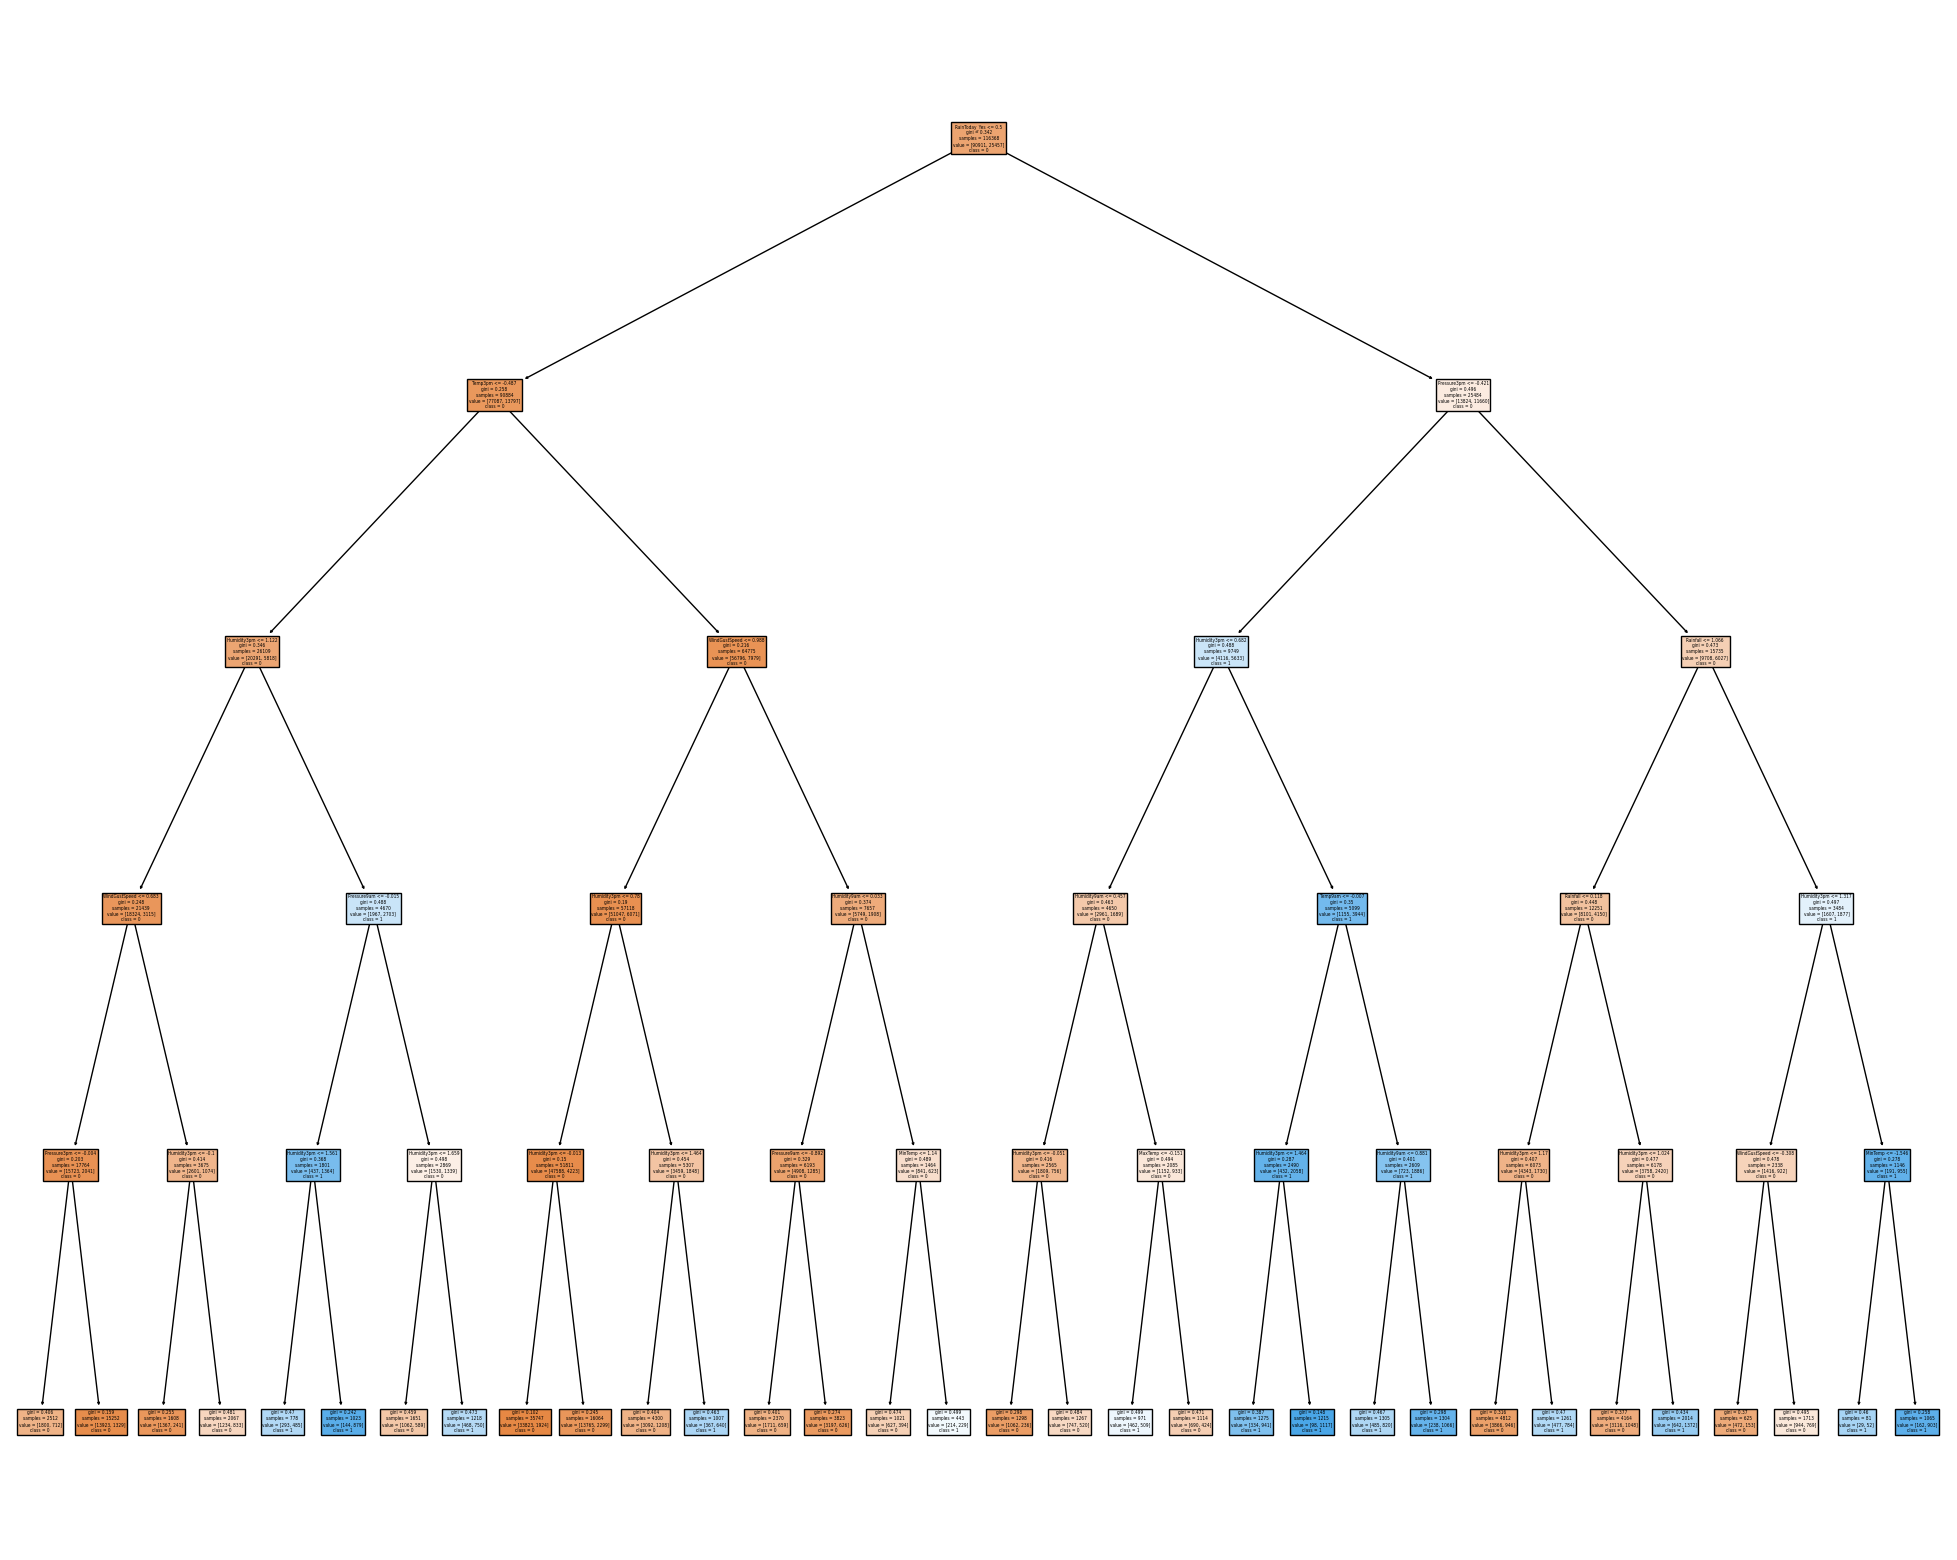

In [72]:
# Plot the tree

# Assuming 'dtree' is your decision tree model and 'x_train' is your training data
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, 
                   feature_names=x_train.columns.tolist(),  # Convert index to list if X_train is a pandas DataFrame
                   class_names=['0', '1'],
                   filled=True)
plt.show()

In [73]:
# predict the train data
y_pred_train_d = dtree.predict(x_train)
y_pred_test_d = dtree.predict(x_test)

In [74]:
y_pred_train_d

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
y_pred_test_d

array([0., 0., 0., ..., 0., 1., 0.])

In [76]:
# Accuracy score for tarin
dtree.score(x_train, y_train)

0.8339491956551629

In [77]:
# Accuracy score for test
dtree.score(x_test, y_test)

0.8303313625739035

Model Evaluation

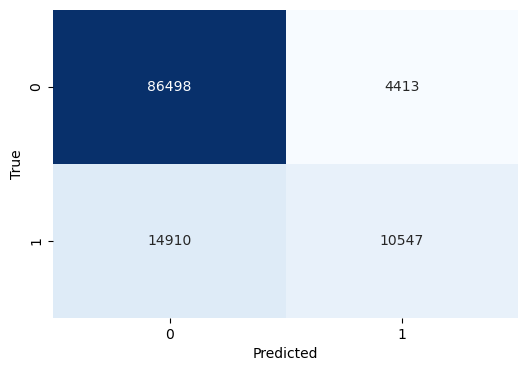

In [78]:
# confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train_d)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

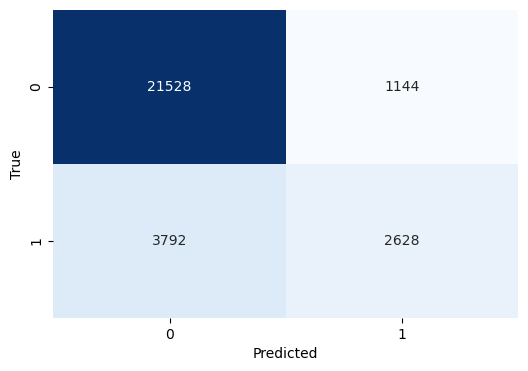

In [79]:
# confussion matrix for test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_d)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train_d)
train_precision = precision_score(y_train, y_pred_train_d)
train_recall = recall_score(y_train, y_pred_train_d)
train_f1_score = f1_score(y_train, y_pred_train_d)
train_roc_auc = roc_auc_score(y_train, y_pred_train_d)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test_d)
test_precision = precision_score(y_test, y_pred_test_d)
test_recall = recall_score(y_test, y_pred_test_d)
test_f1_score = f1_score(y_test, y_pred_test_d)
test_roc_auc = roc_auc_score(y_test, y_pred_test_d)

In [81]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [82]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.833949
1,Precision score,0.705013
2,Recall score,0.414306
3,F1 score,0.521909
4,Roc Auc score,0.682882


In [83]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.830331
1,Precision score,0.696713
2,Recall score,0.409346
3,F1 score,0.515699
4,Roc Auc score,0.679444


3. RANDOM FOREST

In [84]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [85]:
random_model = RandomForestClassifier(criterion='gini', max_depth=5, max_features="sqrt")

In [86]:
random_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [87]:
# Predict the train and test datas
y_pred_train_r = random_model.predict(x_train)
y_pred_test_r = random_model.predict(x_test)

In [88]:
proba_score_train = random_model.predict_proba(x_train)
proba_score_test = random_model.predict_proba(x_test)

In [89]:
proba_score_test

array([[0.49983505, 0.50016495],
       [0.91204943, 0.08795057],
       [0.75664728, 0.24335272],
       ...,
       [0.90157627, 0.09842373],
       [0.58276346, 0.41723654],
       [0.92981243, 0.07018757]])

In [90]:
proba_score_train

array([[0.6488856 , 0.3511144 ],
       [0.88334623, 0.11665377],
       [0.87354386, 0.12645614],
       ...,
       [0.90074267, 0.09925733],
       [0.54409576, 0.45590424],
       [0.88045864, 0.11954136]])

In [91]:
# Accuracy score for test
print("Accuracy score for train:", random_model.score(x_train, y_train))

Accuracy score for train: 0.8412622026673999


In [92]:
# Accuracy score for train
print("Accuracy score for test:", random_model.score(x_test, y_test))

Accuracy score for test: 0.8344562078922041


Model Evaluation

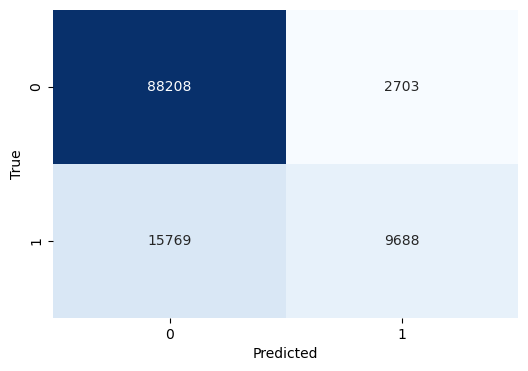

In [93]:
# confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train_r)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

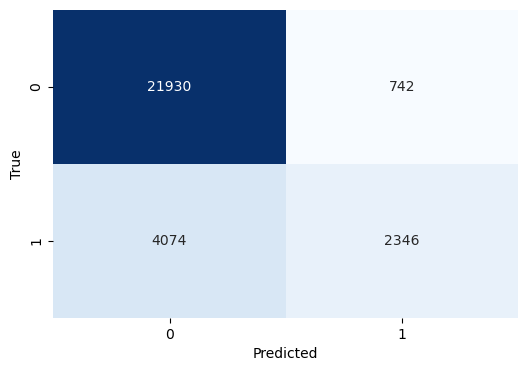

In [94]:
# Confusion matrix for test

cm = confusion_matrix(y_test, y_pred_test_r)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train_r)
train_precision = precision_score(y_train, y_pred_train_r)
train_recall = recall_score(y_train, y_pred_train_r)
train_f1_score = f1_score(y_train, y_pred_train_r)
train_roc_auc = roc_auc_score(y_train, y_pred_train_r)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test_r)
test_precision = precision_score(y_test, y_pred_test_r)
test_recall = recall_score(y_test, y_pred_test_r)
test_f1_score = f1_score(y_test, y_pred_test_r)
test_roc_auc = roc_auc_score(y_test, y_pred_test_r)

In [96]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [97]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.841262
1,Precision score,0.781858
2,Recall score,0.380563
3,F1 score,0.511943
4,Roc Auc score,0.675415


In [98]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.834456
1,Precision score,0.759715
2,Recall score,0.365421
3,F1 score,0.493479
4,Roc Auc score,0.666346


4. NAIV BIAS

In [99]:
# import Naive Bias classifier
from sklearn.naive_bayes import GaussianNB

In [100]:
nb_model = GaussianNB()

In [101]:
nb_model.fit(x_train, y_train)

GaussianNB()

In [102]:
# predict the train and test
y_pred_train_nb = nb_model.predict(x_train)
y_pred_test_nb = nb_model.predict(x_test)

In [103]:
y_pred_train_nb

array([1., 0., 0., ..., 0., 1., 0.])

In [104]:
y_pred_test_nb

array([1., 0., 0., ..., 0., 0., 0.])

Model Evaluation

In [105]:
from sklearn.metrics import classification_report
# Assuming y_test and pred are defined
report = classification_report(y_test, y_pred_test_nb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88     22672
         1.0       0.57      0.50      0.53      6420

    accuracy                           0.81     29092
   macro avg       0.72      0.70      0.71     29092
weighted avg       0.80      0.81      0.80     29092



In [106]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_test_nb))
pd.crosstab(y_test, y_pred_test_nb, rownames = ['Actual'], colnames= ['Predictions'])

0.8057885329300152


Predictions,0.0,1.0
Actual,,
0.0,20203,2469
1.0,3181,3239


In [107]:
from sklearn.metrics import classification_report
# Assuming y_test and pred are defined
report = classification_report(y_train, y_pred_train_nb)
print("Classification Report:\n", report)

# Evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_train_nb))
pd.crosstab(y_train, y_pred_train_nb, rownames = ['Actual'], colnames= ['Predictions'])

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     90911
         1.0       0.57      0.51      0.54     25457

    accuracy                           0.81    116368
   macro avg       0.72      0.70      0.71    116368
weighted avg       0.80      0.81      0.80    116368

0.8085040560978963


Predictions,0.0,1.0
Actual,,
0.0,81022,9889
1.0,12395,13062


5. K-NEAREST NEIGHBOURS

In [108]:
# import K nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier

In [109]:
#acc = []

# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values

#for i in range(3,50,2):
#    neigh = KNeighborsClassifier(n_neighbors=i)
#    neigh.fit(x_train, y_train)
#    train_acc = np.mean(neigh.predict(x_train) == y_train)
#    test_acc = np.mean(neigh.predict(x_test) == y_test)
#    acc.append([train_acc, test_acc])
#
#acc

In [110]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [111]:
# Make predictions on both training and testing data
#y_pred_train_knn = knn.predict(x_train)
#y_pred_test_knn = knn.predict(x_test)

The K nearest neighbours classifier is suitable for limited size of dataset

## BOOSTING METHODS

1. Ada Boosting

2. GradientBoosting Classifier

3. XGB Classifier

4. LightGBM

5. CatBoost

1. Ada Boosting

In [112]:
# importing AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

In [113]:
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier()

In [114]:
# Predict the train and test dataset
y_pred_train_ada = ada_model.predict(x_train)
y_pred_test_ada = ada_model.predict(x_test)

In [115]:
y_pred_train_ada

array([0., 0., 0., ..., 0., 1., 0.])

In [116]:
y_pred_test_ada

array([1., 0., 0., ..., 0., 0., 0.])

In [117]:
# Accuracy score
print("Accuracy score for train:", ada_model.score(x_train, y_train))
print("Accuracy score for test:", ada_model.score(x_test, y_test))

Accuracy score for train: 0.8431613501993676
Accuracy score for test: 0.838271689811632


In [118]:
proba_score_train = ada_model.predict_proba(x_train)
proba_score_test = ada_model.predict_proba(x_test)

In [119]:
proba_score_train

array([[0.50466533, 0.49533467],
       [0.51606544, 0.48393456],
       [0.51179625, 0.48820375],
       ...,
       [0.51190471, 0.48809529],
       [0.49779918, 0.50220082],
       [0.51259154, 0.48740846]])

In [120]:
proba_score_test

array([[0.49436031, 0.50563969],
       [0.51666826, 0.48333174],
       [0.50399113, 0.49600887],
       ...,
       [0.51028211, 0.48971789],
       [0.50013103, 0.49986897],
       [0.51364035, 0.48635965]])

Model Evaluation

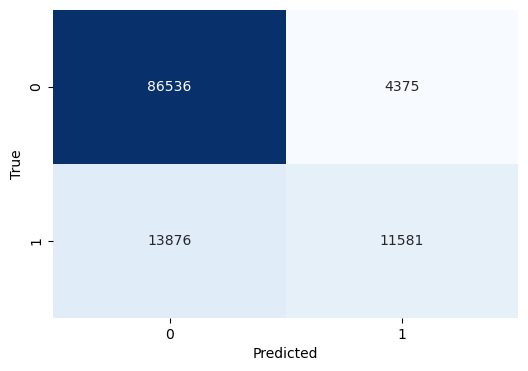

In [121]:
# confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train_ada)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

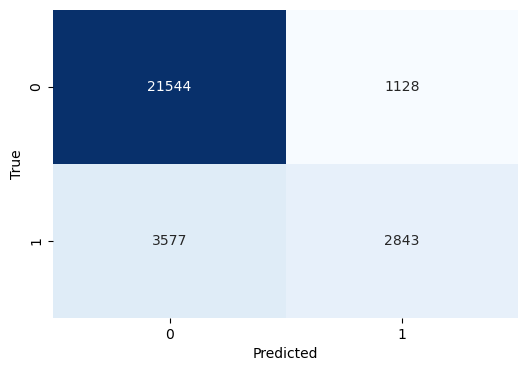

In [122]:
# confussion matrix for test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_ada)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train_ada)
train_precision = precision_score(y_train, y_pred_train_ada)
train_recall = recall_score(y_train, y_pred_train_ada)
train_f1_score = f1_score(y_train, y_pred_train_ada)
train_roc_auc = roc_auc_score(y_train, y_pred_train_ada)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test_ada)
test_precision = precision_score(y_test, y_pred_test_ada)
test_recall = recall_score(y_test, y_pred_test_ada)
test_f1_score = f1_score(y_test, y_pred_test_ada)
test_roc_auc = roc_auc_score(y_test, y_pred_test_ada)

In [124]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [125]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.843161
1,Precision score,0.725808
2,Recall score,0.454924
3,F1 score,0.559293
4,Roc Auc score,0.703400


In [126]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.838272
1,Precision score,0.715941
2,Recall score,0.442835
3,F1 score,0.547204
4,Roc Auc score,0.696541


2. GradientBoosting Classifier

In [127]:
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
gbc = GradientBoostingClassifier()


In [129]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [130]:
# Predict the train and test dataset
y_pred_train_gbc = gbc.predict(x_train)
y_pred_test_gbc = gbc.predict(x_test)

In [131]:
y_pred_train_gbc

array([0., 0., 0., ..., 0., 1., 0.])

In [132]:
y_pred_test_gbc

array([1., 0., 0., ..., 0., 0., 0.])

In [133]:
# Accuracy for train
gbc.score(x_train, y_train)

0.8494431458820294

In [134]:
# Accuracy for test 
gbc.score(x_test, y_test)

0.8436683624364086

Model Evaluation

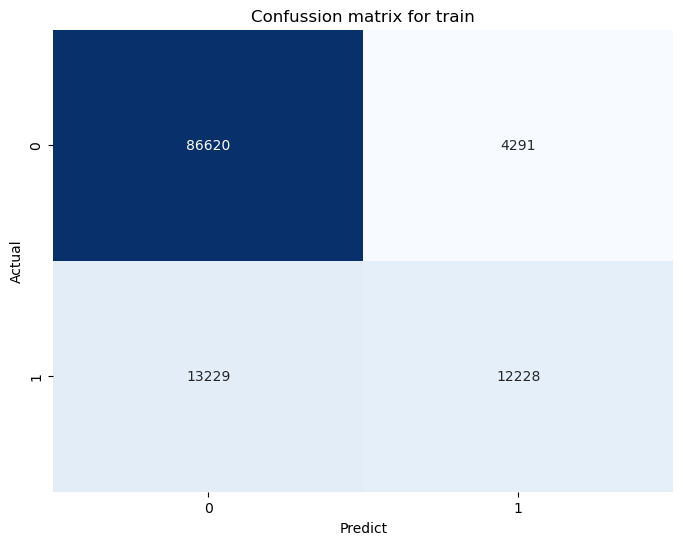

In [135]:
# Confussion matrix for train data

cm = confusion_matrix(y_train, y_pred_train_gbc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confussion matrix for train")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

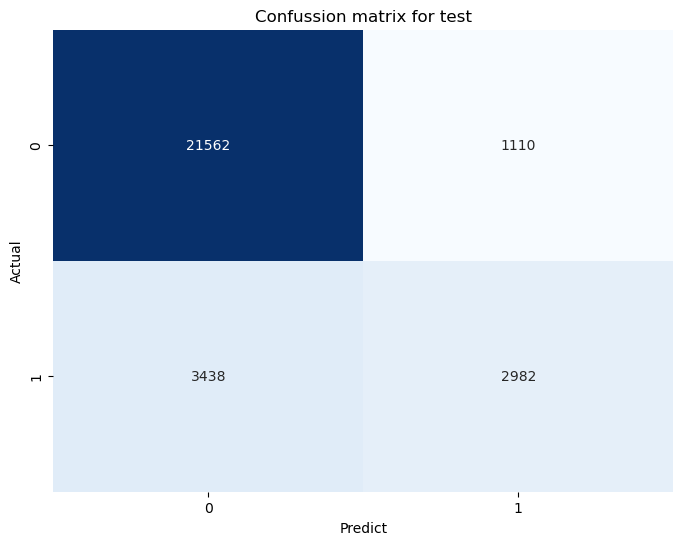

In [136]:
# Confussion matrix for test

cm = confusion_matrix(y_test, y_pred_test_gbc)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confussion matrix for test")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [137]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train_gbc)
train_precision = precision_score(y_train, y_pred_train_gbc)
train_recall = recall_score(y_train, y_pred_train_gbc)
train_f1_score = f1_score(y_train, y_pred_train_gbc)
train_roc_auc = roc_auc_score(y_train, y_pred_train_gbc)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test_gbc)
test_precision = precision_score(y_test, y_pred_test_gbc)
test_recall = recall_score(y_test, y_pred_test_gbc)
test_f1_score = f1_score(y_test, y_pred_test_gbc)
test_roc_auc = roc_auc_score(y_test, y_pred_test_gbc)

In [138]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [139]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.849443
1,Precision score,0.740239
2,Recall score,0.480339
3,F1 score,0.582619
4,Roc Auc score,0.716570


In [140]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.843668
1,Precision score,0.728739
2,Recall score,0.464486
3,F1 score,0.567352
4,Roc Auc score,0.707763


3. XGB Classifier

In [141]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [142]:
from xgboost import XGBClassifier

In [143]:
#creating an extreme Gradient boosting instance
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
# Predict the tarin and test
y_pred_train = xgb.predict(x_train)
y_pred_test = xgb.predict(x_test)

In [145]:
y_pred_train

array([1, 0, 0, ..., 0, 1, 0])

In [146]:
y_pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [147]:
# Accuracy score for train
xgb.score(x_train, y_train)

0.8797349786882992

In [148]:
# Accuracy score for test
xgb.score(x_test, y_test)

0.8506805994775196

Model Evaluation

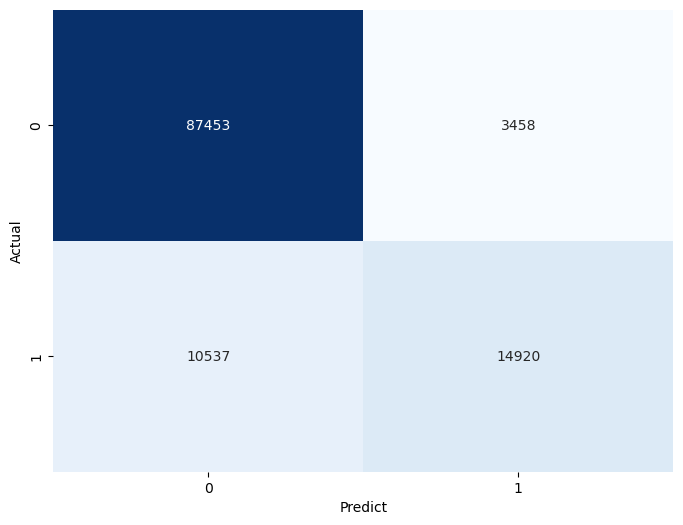

In [149]:
# Confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

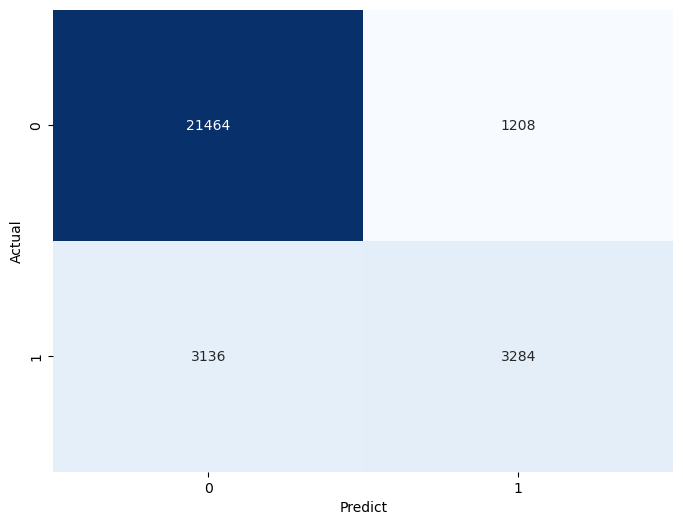

In [150]:
# Confussion matrix for test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [152]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [153]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.879735
1,Precision score,0.811840
2,Recall score,0.586086
3,F1 score,0.680735
4,Roc Auc score,0.774025


In [154]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.850681
1,Precision score,0.731077
2,Recall score,0.511526
3,F1 score,0.601906
4,Roc Auc score,0.729122


4. LightGBM

In [155]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [156]:
import lightgbm as ltb

In [157]:
lgb = ltb.LGBMClassifier()

In [158]:
# Fitt the model
lgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 25457, number of negative: 90911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2184
[LightGBM] [Info] Number of data points in the train set: 116368, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218763 -> initscore=-1.272890
[LightGBM] [Info] Start training from score -1.272890


LGBMClassifier()

In [159]:
# Predict the train and test
y_pred_train = lgb.predict(x_train)
y_pred_test = lgb.predict(x_test)

In [160]:
y_pred_train

array([0., 0., 0., ..., 0., 1., 0.])

In [161]:
y_pred_test

array([1., 0., 0., ..., 0., 1., 0.])

In [162]:
# Accuracy score for train
lgb.score(x_train, y_train)

0.8595833906228516

In [163]:
# Accuracuy for test
lgb.score(x_test, y_test)

0.8479307025986526

Model Evaluation

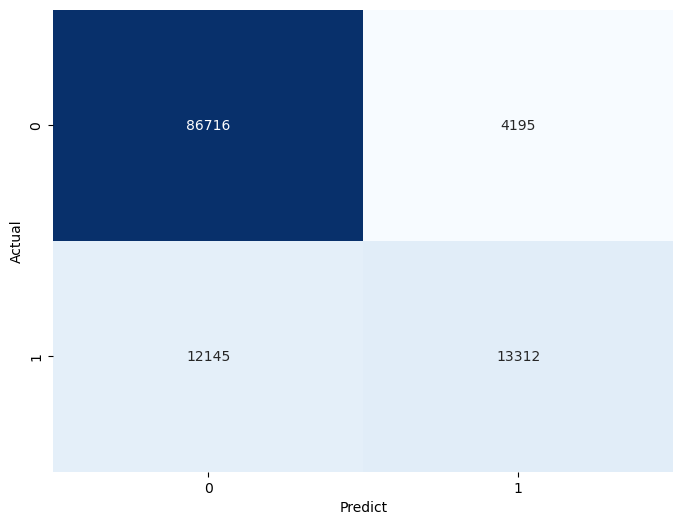

In [164]:
# Confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

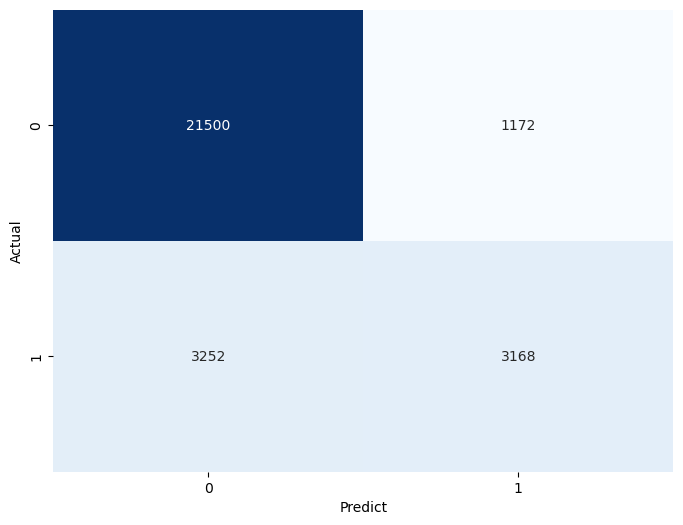

In [165]:
# Confussion matrix for test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [167]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [168]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.859583
1,Precision score,0.760382
2,Recall score,0.522921
3,F1 score,0.619682
4,Roc Auc score,0.738388


In [169]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.847931
1,Precision score,0.729954
2,Recall score,0.493458
3,F1 score,0.588848
4,Roc Auc score,0.720882


5. CatBoost

In [170]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [171]:
from catboost import CatBoostClassifier

In [172]:
cbc = CatBoostClassifier()

In [173]:
# Fitt the model
cbc.fit(x_train, y_train)

Learning rate set to 0.078532
0:	learn: 0.6385326	total: 224ms	remaining: 3m 43s
1:	learn: 0.5934756	total: 290ms	remaining: 2m 24s
2:	learn: 0.5554819	total: 365ms	remaining: 2m 1s
3:	learn: 0.5280361	total: 473ms	remaining: 1m 57s
4:	learn: 0.5047023	total: 604ms	remaining: 2m
5:	learn: 0.4833545	total: 665ms	remaining: 1m 50s
6:	learn: 0.4658874	total: 750ms	remaining: 1m 46s
7:	learn: 0.4523800	total: 827ms	remaining: 1m 42s
8:	learn: 0.4412985	total: 916ms	remaining: 1m 40s
9:	learn: 0.4315037	total: 961ms	remaining: 1m 35s
10:	learn: 0.4233876	total: 1.07s	remaining: 1m 36s
11:	learn: 0.4160997	total: 1.16s	remaining: 1m 35s
12:	learn: 0.4096797	total: 1.27s	remaining: 1m 36s
13:	learn: 0.4046787	total: 1.32s	remaining: 1m 33s
14:	learn: 0.4008383	total: 1.44s	remaining: 1m 34s
15:	learn: 0.3967903	total: 1.51s	remaining: 1m 32s
16:	learn: 0.3928604	total: 1.57s	remaining: 1m 31s
17:	learn: 0.3901690	total: 1.61s	remaining: 1m 28s
18:	learn: 0.3878098	total: 1.72s	remaining: 1m 2

In [174]:
# Predict the train and test
y_pred_train = cbc.predict(x_train)
y_pred_test = cbc.predict(x_test)

In [175]:
y_pred_train

array([1., 0., 0., ..., 0., 1., 0.])

In [176]:
y_pred_test

array([1., 0., 0., ..., 0., 1., 0.])

In [177]:
# Accuracy score for train
cbc.score(x_train, y_train)

0.8801818369311151

In [178]:
# Accuracy score for test
cbc.score(x_test, y_test)

0.8538773545992026

Model Evaluation

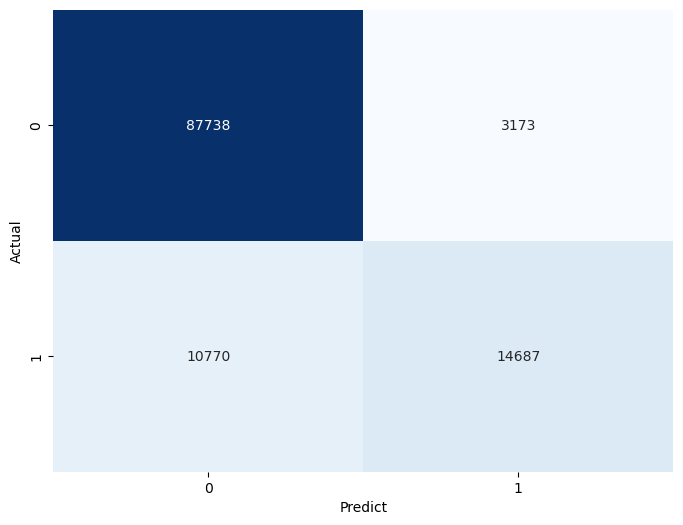

In [179]:
# Confussion matrix for train
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

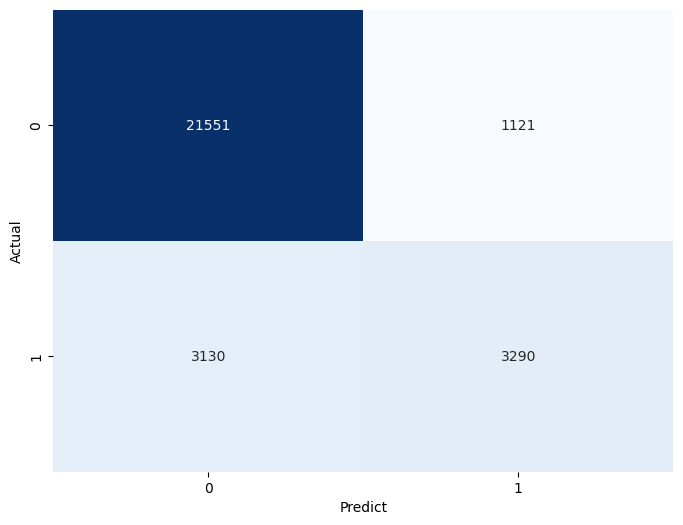

In [180]:
# Confussion matrix for test
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# For train data
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)
train_roc_auc = roc_auc_score(y_train, y_pred_train)

# For test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

In [182]:
d1 = {"Train":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[train_accuracy,train_precision,train_recall,train_f1_score,train_roc_auc]}
d2 = {"Test":["Accuracy score","Precision score","Recall score","F1 score","Roc Auc score"], "Values":[test_accuracy,test_precision,test_recall,test_f1_score,test_roc_auc]}

In [183]:
pd.DataFrame(d1)

,Train,Values
0,Accuracy score,0.880182
1,Precision score,0.822340
2,Recall score,0.576934
3,F1 score,0.678117
4,Roc Auc score,0.771016


In [184]:
pd.DataFrame(d2)

,Test,Values
0,Accuracy score,0.853877
1,Precision score,0.745863
2,Recall score,0.512461
3,F1 score,0.607515
4,Roc Auc score,0.731508
